# **Project Name**    - NYC Taxi Trip Time Prediction Regression Project 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Arumugam Balasuadhakar


# **Project Summary -**



*   The NYC Taxi Trip Duration project is a machine learning regression model that aims to predict the duration of a taxi trip in New York City based on various input features such as the pickup and dropoff locations, the time of day, and the distance of the trip. The goal of the project is to improve the efficiency and convenience of taxi services by providing more accurate estimates of trip duration for both passengers and drivers.
*   The duration of trip prediction is essential for all travel based business. The current project is based on the machine learning regression model used to predict the taxi trip duration in New York City. The main aim of this project is to provide more precise approximation of trip duration for the customers and drivers.
*   The past data of taxi trip in NYC have been used for developing the model. The data contained the information such as pickup datetime, dropoff datetime,  Passenger count, pickup longitude, pickup latitude, drop off longitude, drop off latitude, store_and_fwd_flag, and trip duration. The preprocessing was done for the data to handle missing values and transform categorical variables.The additional information such as distance between the location, day of the week  and time have been extracted by applied on future engineering techniques.
*   The regression algorithms such as linear regression, random forest and XG Boost have been adopted for developing the model. The optimization of the performance of the developed model was done by hyper parameter tuning. The mean absolute error and R-squared are the two  matrices used to evaluate the model. The LightGBM Regression model was performed well compared to other model. The testing of model was done by hold-out test set which is capable to predict high accuracy. It was observed from the result the  model can able to predict the duration of drip with very less average error.
*   The important features to predict the duration are identified in this project; those are location for pickup and drop, time and the distance. Finally the machine learning regression algorithm has successfully established for predicting the duration of NYC taxi trip.










# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [67]:
# Import Libraries
import numpy as np
import pandas as pd
import datetime as dt

# Importing Statistics Library
import scipy.stats as stats

# Importing Data Visualisation Libraray
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns

# Importing Machine Learning Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Importing the rerquired libraries to check the accuracy of the model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Import Warnings filter control
import warnings 
warnings.filterwarnings('ignore')
     

### Dataset Loading

In [68]:
# Google drive mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# Load Dataset
file_path= "/content/drive/MyDrive/csv file/NYC Taxi Data.csv"
df = pd.read_csv(file_path)

### Dataset First View

In [70]:
# Dataset First Look
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [71]:
# Dataset Rows & Columns count
df.shape

(1458644, 11)

### Dataset Information

In [72]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [73]:
# Dataset Duplicate Value Count
df.duplicated().count

<bound method Series.count of 0          False
1          False
2          False
3          False
4          False
           ...  
1458639    False
1458640    False
1458641    False
1458642    False
1458643    False
Length: 1458644, dtype: bool>

#### Missing Values/Null Values

In [74]:
# Missing Values/Null Values Count
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### What did you know about your dataset?

This dataset contains 14,58,644 rows and 11 columns.There is no null values and duplicate values in the dataset. The data types of the pickup_datetime and dropoff_datetime are object type.It need to be converted in to datetime data type. 

## ***2. Understanding Your Variables***

In [75]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [76]:
# Dataset Describe
df.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


### Variables Description 

* id - a unique identifier for each trip

* vendor_id - a code indicating the provider associated with the trip record

* pickup_datetime - date and time when the meter was engaged

* dropoff_datetime - date and time when the meter was disengaged

* passenger_count - the number of passengers in the vehicle (driver entered value)

* pickup_longitude - the longitude where the meter was engaged

* pickup_latitude - the latitude where the meter was engaged

* dropoff_longitude - the longitude where the meter was disengaged

* dropoff_latitude - the latitude where the meter was disengaged

* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

* trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.

In [77]:
# Check Unique Values for each variable.
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [78]:
# Write your code to make your dataset analysis ready.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [79]:
# Converting datetime column from object type to datetime data type
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [80]:
df = df[df.trip_duration <= 3400]

In [81]:
# Checking the datetime datatype after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443457 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1443457 non-null  object        
 1   vendor_id           1443457 non-null  int64         
 2   pickup_datetime     1443457 non-null  datetime64[ns]
 3   dropoff_datetime    1443457 non-null  datetime64[ns]
 4   passenger_count     1443457 non-null  int64         
 5   pickup_longitude    1443457 non-null  float64       
 6   pickup_latitude     1443457 non-null  float64       
 7   dropoff_longitude   1443457 non-null  float64       
 8   dropoff_latitude    1443457 non-null  float64       
 9   store_and_fwd_flag  1443457 non-null  object        
 10  trip_duration       1443457 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 132.2+ MB


In [82]:
# Assigning new columns to the dataframe
df['pickup_day_num']   = df.pickup_datetime.dt.weekday
df['dropoff_day_num']   = df.dropoff_datetime.dt.weekday
df['pickup_month']         = df.pickup_datetime.dt.month
df['dropoff_month']         = df.dropoff_datetime.dt.month
df['pickup_hour']   = df.pickup_datetime.dt.hour
df['dropoff_hour']   = df.dropoff_datetime.dt.hour
df['pickup_weekday']       =df['pickup_datetime'].dt.day_name()
df['dropoff_weekday']       =df['dropoff_datetime'].dt.day_name()

In [83]:
# Function for creating Morning,Afternoon,Evening,Night
def day_period(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Night'

In [84]:
# Creating the columns pickup period and drop period
df['pickup_period'] = df['pickup_hour'].apply(day_period)
df['dropoff_period']=df['dropoff_hour'].apply(day_period)

In [85]:
# Import haversine formula for calculting distance
!pip install haversine
from haversine import haversine 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
# Creating function to calculate the distance by latitude and longitute
def calc_distance(taxi_df):
    pickup = (taxi_df['pickup_latitude'], taxi_df['pickup_longitude'])
    drop   = (taxi_df['dropoff_latitude'], taxi_df['dropoff_longitude'])
    return haversine(pickup, drop)

In [87]:
# Calculate the distance and assigning new column for distance 
df['distance'] = df.apply(lambda x: calc_distance(x), axis = 1)

In [88]:
# Calculating the speed of trip and assigning new column
df['speed'] = (df.distance/(df.trip_duration/3600))

In [89]:
# Checking all the new columns
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_period,dropoff_period,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,17,17,Monday,Monday,Evening,Evening,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,0,0,Sunday,Sunday,Night,Night,1.805510,9.803672


### What all manipulations have you done and insights you found?

The following manipulations were done in the datawrangling process


*   The pickup and drop datetime columns were converted to datetime data type from object type.
*   Assigning new columns to the dataframe for weekday number, month,hour and weekday,period for both pickup and dropoff.
*   Distance was calculated for each trip and added as a new column.
*   Speed of the trip was calculated and added as a new column.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [90]:
# Chart - 1 Vsualization code
# Passanger count of the trips
df.passenger_count.value_counts()

1    1023736
2     207556
5      77174
3      59183
6      47755
4      27989
0         59
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Text(0, 0.5, 'Number of trips')

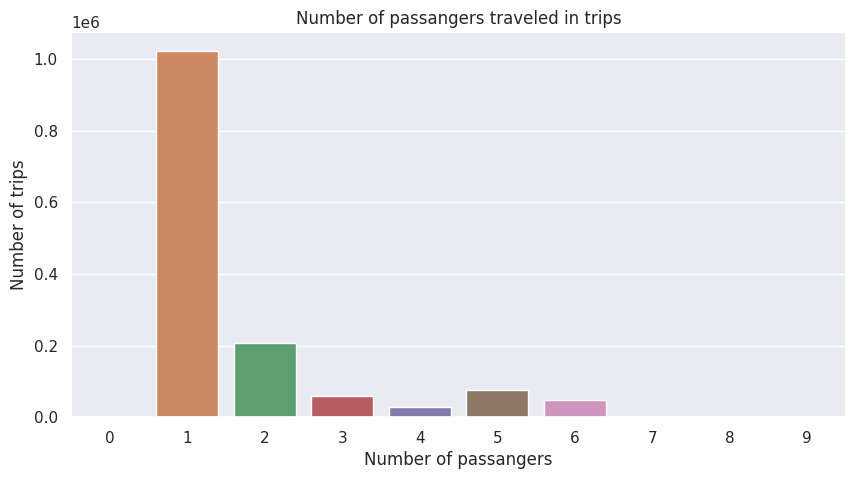

In [91]:
# Visulaization of passanger count
sns.set(rc={'figure.figsize':(10,5)});
sns.countplot(x='passenger_count',data=df)
plt.title('Number of passangers traveled in trips');
plt.xlabel('Number of passangers')
plt.ylabel('Number of trips')

##### 1. Why did you pick the specific chart?

Tofind the number of passangers traveled in each trips

##### 2. What is/are the insight(s) found from the chart?

Most of the trips are with single passanger.Seven passangers with 3 trips and without passanger 60 trip.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Number passangers traveled in most of the trips are identified.

#### Chart - 2

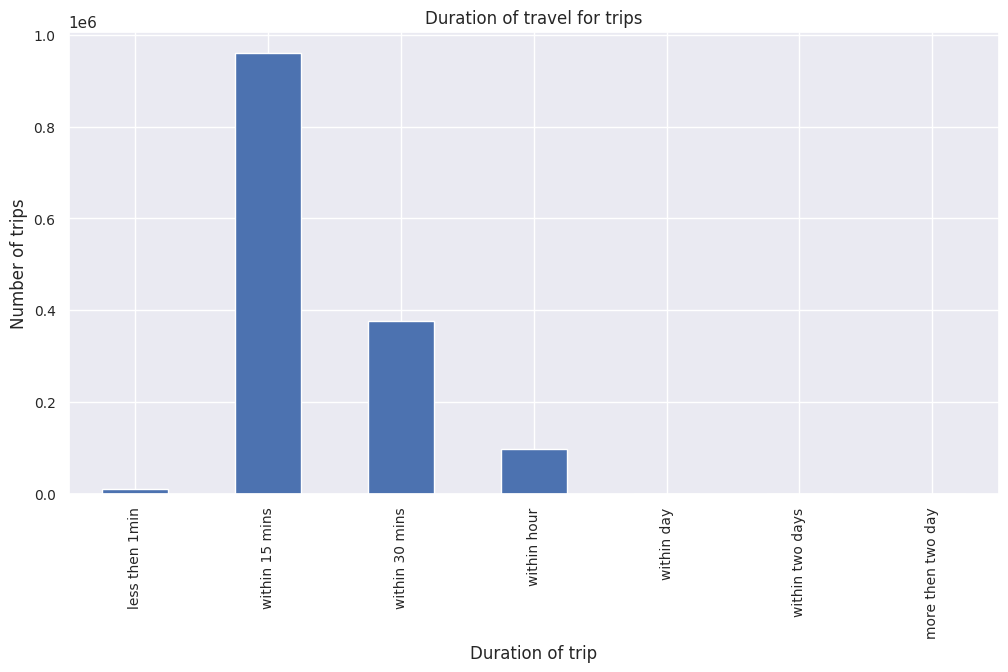

In [92]:
# Chart - 2 Visualization code
# Visualization of trip duration
plt.figure(figsize=[12,6])
labels=['less then 1min','within 15 mins','within 30 mins','within hour','within day','within two days','more then two day']
df.groupby(pd.cut(df['trip_duration'],bins=[0,60,900,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=10)
plt.title("Duration of travel for trips")
plt.ylabel("Number of trips")
plt.xlabel("Duration of trip")
plt.show()

##### 1. Why did you pick the specific chart?

To find the duration of trips

##### 2. What is/are the insight(s) found from the chart?

Some trips are less than one minutes, some trips are within the day.Most of the trips are within 15 minutes and within 30 minutes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By identifying trip duration company can plan for better utilization of vehicles.

#### Chart - 3

<Axes: title={'center': 'Vendors'}, ylabel='vendor_id'>

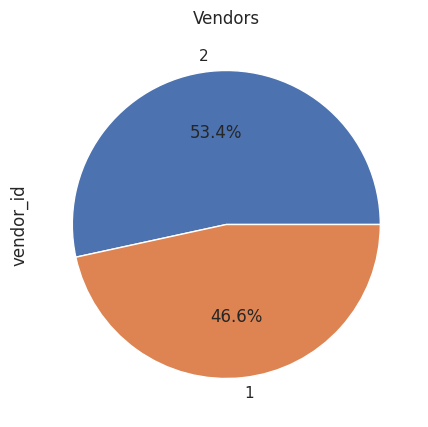

In [93]:
# Chart - 3 visualization code

df['vendor_id'].value_counts().plot(kind='pie',title="Vendors",autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

To find the percentage of trips completed by each vendor.

##### 2. What is/are the insight(s) found from the chart?

 Both the vendors completed trips almost equal percentage. Vendor 2 slightly more compared to vendore 1

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

based on the trips of vendors copany can identify the performance of each vendors

#### Chart - 4

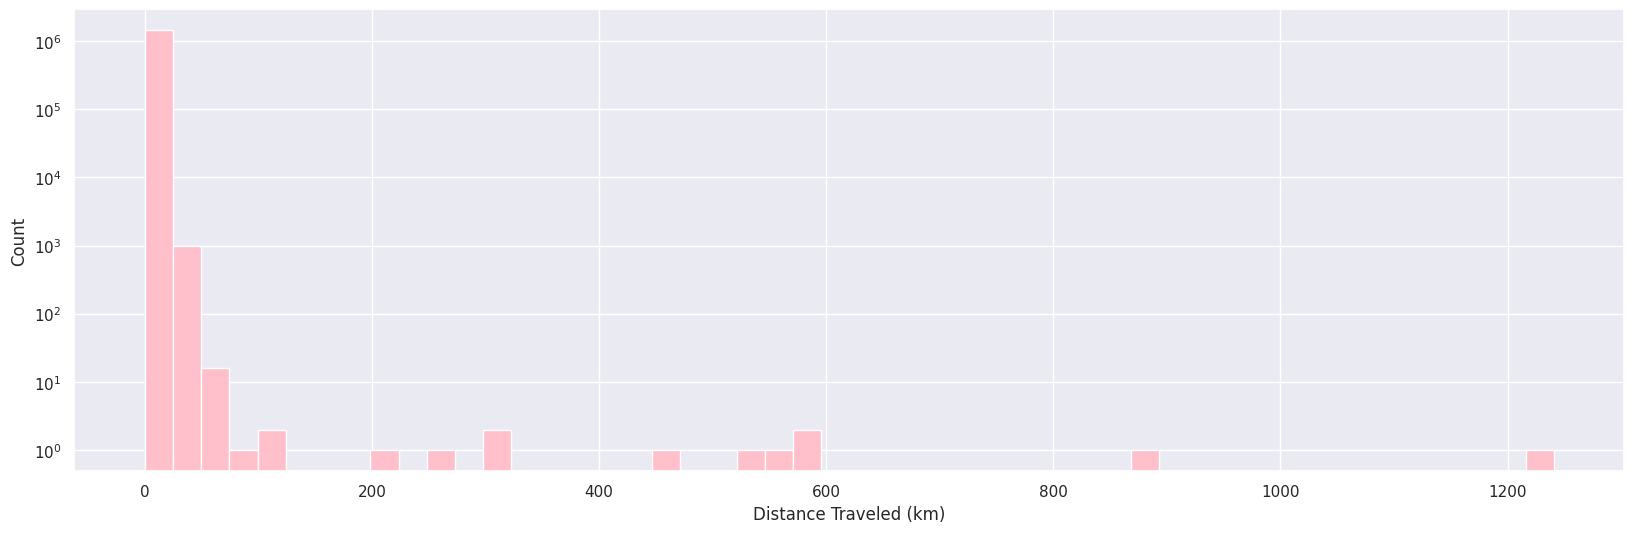

In [94]:
# Chart - 4 visualization code
# Visualization of distance traveled
ax = df['distance'].hist(bins=50, figsize=(20,6),color='pink')
ax.set_yscale('log')
ax.set_xlabel("Distance Traveled (km)")
ax.set_ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

To find the distance traveled by the vehicles.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

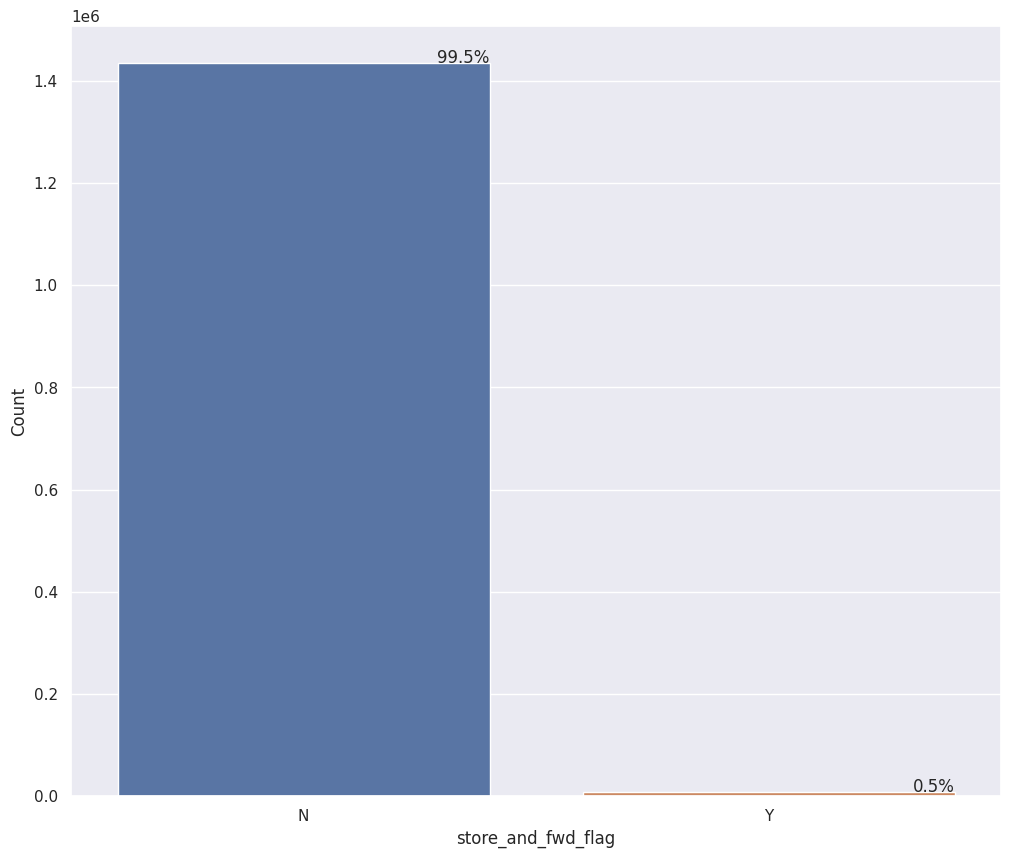

In [95]:
# Chart - 5 visualization code
# Visualization of Store and Forward Flag Y & N
plt.figure(figsize = (12,10))
total = float(len(df))
ax=sns.countplot(x='store_and_fwd_flag',data=df)
plt.ylabel('Count')
plt.xlabel('store_and_fwd_flag')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

To check whether the trip details stored in the vehicle memory

##### 2. What is/are the insight(s) found from the chart?

The trip details stored in vehicle memory is 0.6% only

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Company can take necessary steps to improve the detaile storing in vehicle memory

#### Chart - 6

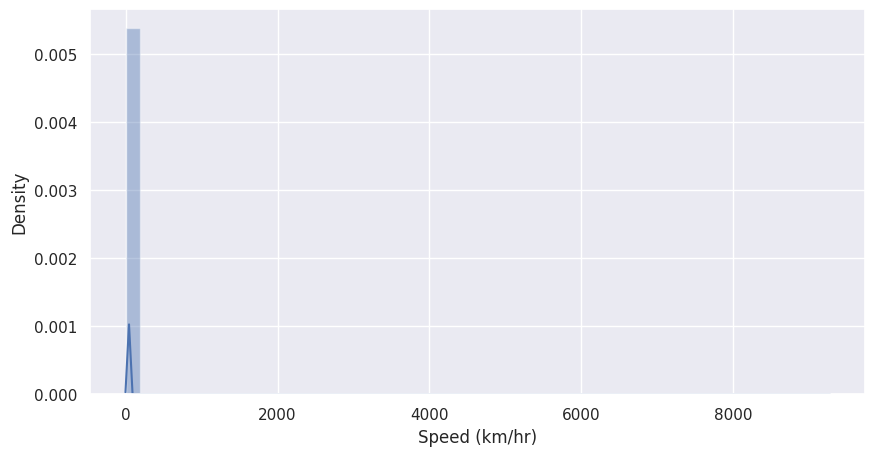

In [96]:
# Chart - 6 visualization code
# Visualization of speed
plt.figure(figsize = (10,5))
sns.distplot(df['speed'])
plt.xlabel('Speed (km/hr)')
plt.show()
     

In [97]:
# Maximum speed of the vehicle
df.speed.max()

9274.849542192556

Some place speed are 200 to 9274. This may be due to following reasons
*   Due to some technical issue of software
*   Some trip passanger or driver cancelled the trip due to some reasons.

So inorder to havethe consistance data we take speed value less than or equalto 100 km/h



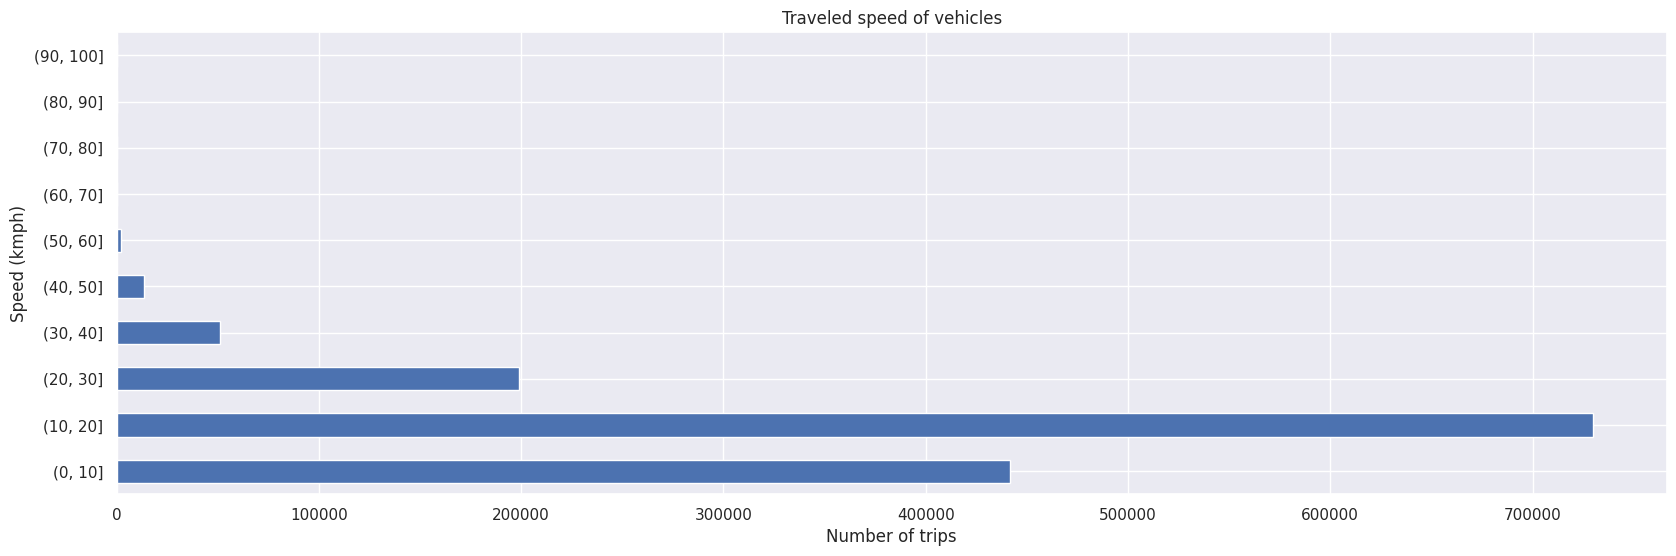

In [98]:
# visulaization of traveled speed of vehicles less than or equal 100 km/h
df[df.speed<=100].speed.groupby(pd.cut(df.speed, np.arange(0,110,10))).count().plot(kind = 'barh',figsize = (20,6))
plt.xlabel('Number of trips')
plt.ylabel('Speed (kmph)')
plt.title('Traveled speed of vehicles')
plt.show()

##### 1. Why did you pick the specific chart?

To find the speed of vehicles in most of the trips.

##### 2. What is/are the insight(s) found from the chart?

Most of the trips are between 10 to 20 km/h.Very few trips are 50 to 60km/h

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can identify the very low speed and high speed and the can find the reason for low and high speed.

#### Chart - 7

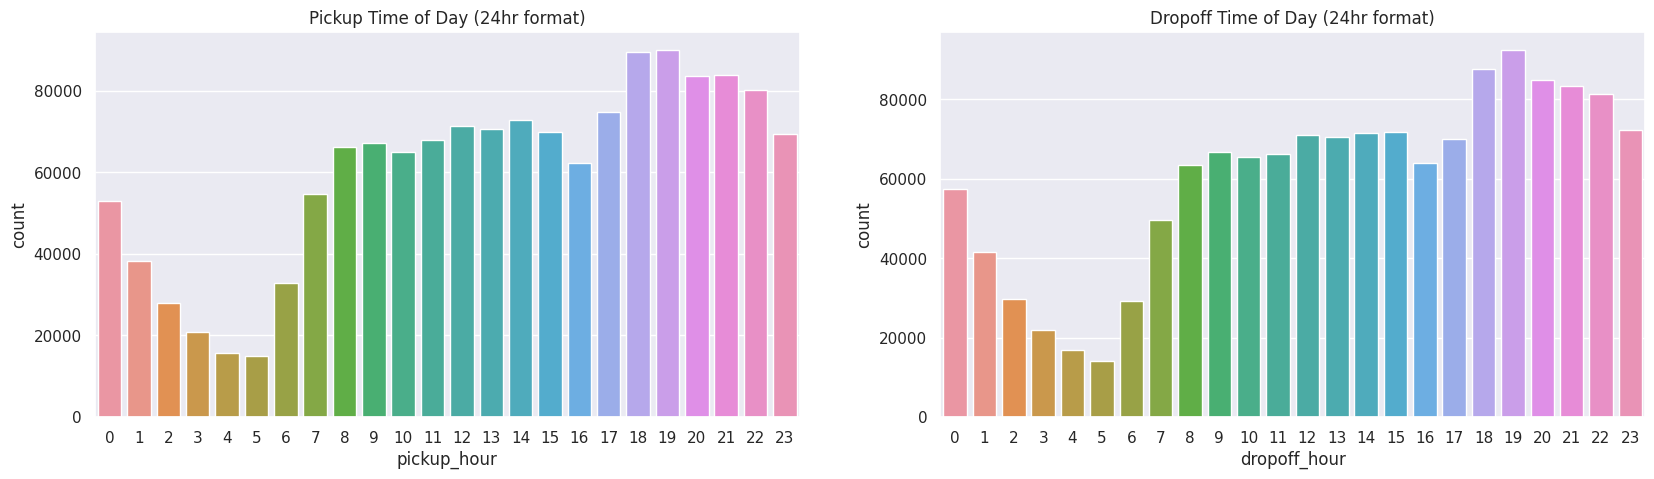

In [99]:
# Chart - 7 visualization code
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day (24hr format)')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax3)
ax4.set_title('Dropoff Time of Day (24hr format)')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax4)

##### 1. Why did you pick the specific chart?

To find the busiest hours in pickup and dropoff.

##### 2. What is/are the insight(s) found from the chart?

More busiest hours in pickup and dropoff is between 6pm to 7pm.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

More demand period for vehicles have been identified and company may provide extra vehicle during that time.

#### Chart - 8

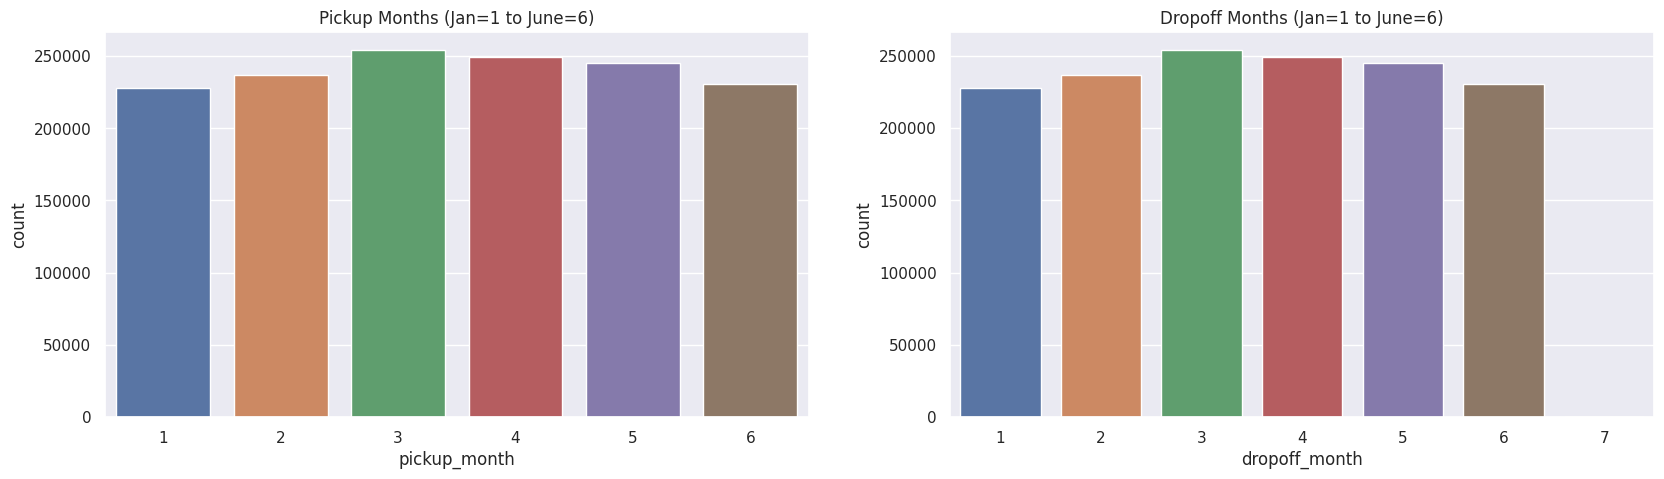

In [100]:
# Chart - 8 visualization code
# Visualization of pickup and dropoff in monthwise
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Months (Jan=1 to June=6)')
ax=sns.countplot(x="pickup_month",data=df,ax=ax1)
ax2.set_title('Dropoff Months (Jan=1 to June=6)')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax2)

##### 1. Why did you pick the specific chart?

To check the monthwise details of pickup and dropoff

##### 2. What is/are the insight(s) found from the chart?

March, April and May months more demand for the vehicles compared to other months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Which are months have more demands have been idendified.The organisation may provide extra vehicles during that months.

#### Chart - 9

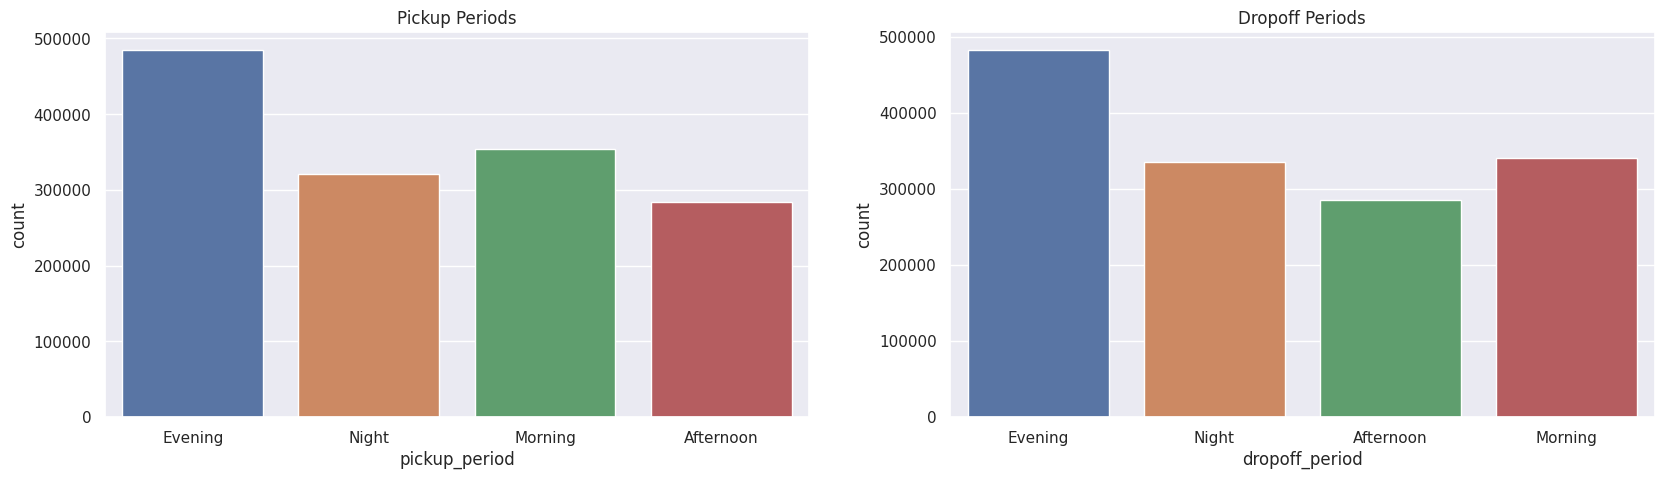

In [101]:
# Chart - 9 visualization code
# Visualization of passenger count Vs duration of trip
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Periods')
ax=sns.countplot(x="pickup_period",data=df,ax=ax3)
ax4.set_title('Dropoff Periods')
ax=sns.countplot(x="dropoff_period",data=df,ax=ax4)

##### 1. Why did you pick the specific chart?

To find which period of the day pickup and dropoff are more.

##### 2. What is/are the insight(s) found from the chart?

Pickup and dropoff are more in evening period and morning period.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Evening and morning periods pickup and dropoff are more the company can make ready more vehicles during that periods.Afternoon period the demand of vehicle is less, so the company can reduce the number of vehicles in afternoon.

#### Chart - 10

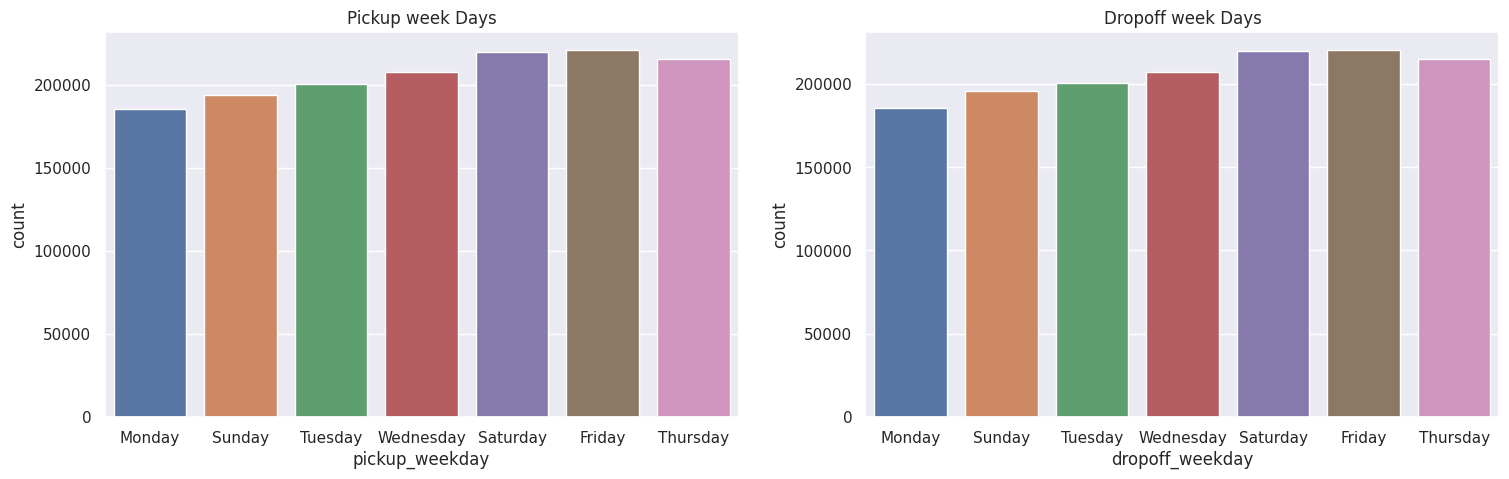

In [102]:
# Chart - 10 visualization code
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(18,5))
ax1.set_title('Pickup week Days')
ax=sns.countplot(x="pickup_weekday",data=df,ax=ax1)
ax2.set_title('Dropoff week Days')
ax=sns.countplot(x="dropoff_weekday",data=df,ax=ax2)

##### 1. Why did you pick the specific chart?

To find which day of the week vehicle demand are more.

##### 2. What is/are the insight(s) found from the chart?

Friday and Saturday the vehicle usage is more.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Friday and Saturday the vehicle usage is more so extra vehicles need to be provided that two days.During monday very less usage of vehicles they can improve the usage by giving some discounts.

#### Chart - 11

In [103]:
# Chart - 11 visualization code
# Visualization of pickup location
lat=df.sample(n=10000, random_state=42)['pickup_latitude'].tolist()
lon=df.sample(n=10000, random_state=42)['pickup_longitude'].tolist()

# Importing plotly express library
import plotly.express as px

# Create a DataFrame with columns 'lat' and 'lon'
data_ = pd.DataFrame({
    'lat': lat,
    'lon': lon
})

# Create a density map
fig = px.density_mapbox(data_, lat='lat', lon='lon', radius=10, zoom=9,
                        mapbox_style="carto-positron", opacity=0.8)
fig.update_layout(title='Pick Up Locations', width=900, height=500)


In [104]:
# Visualization of dropoff location
lat=df.sample(n=10000, random_state=42)['dropoff_latitude'].tolist()
lon=df.sample(n=10000, random_state=42)['dropoff_longitude'].tolist()

# Importing plotly express library
import plotly.express as px

# Create a DataFrame with columns 'lat' and 'lon'
data_ = pd.DataFrame({
    'lat': lat,
    'lon': lon
})

# Create a density map
fig = px.density_mapbox(data_, lat='lat', lon='lon', radius=10, zoom=9,
                        mapbox_style="carto-positron", opacity=0.8)
fig.update_layout(title='Dropoff Locations', width=900, height=500)

##### 1. Why did you pick the specific chart?

To find which location pick up and drop are more

##### 2. What is/are the insight(s) found from the chart?

Most of the pick up and dropoff locations have been identified.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In most demand pickup locations company they can keep more vehicles.

#### Chart - 12

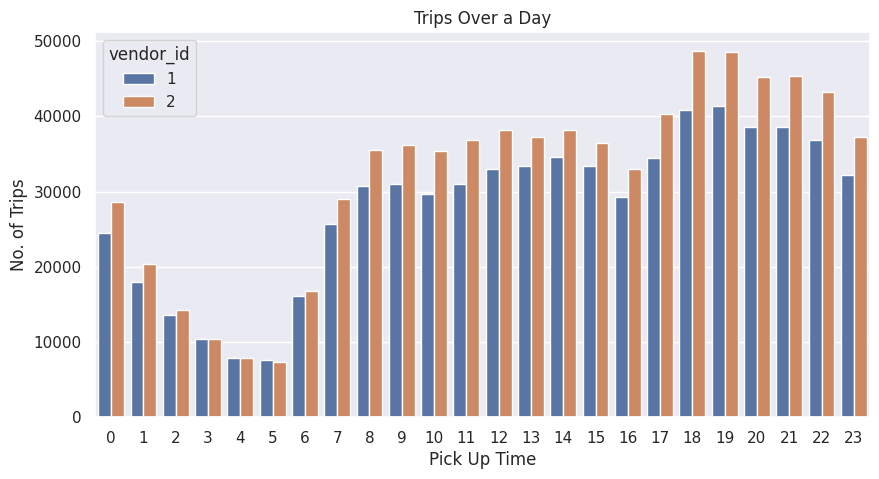

In [105]:
# Chart - 12 visualization code
# Visualization of number of trips in each time for both vendor
sns.countplot(x=df['pickup_datetime'].dt.hour, hue=df['vendor_id'] )
plt.xlabel('Pick Up Time')
plt.ylabel('No. of Trips')
plt.title('Trips Over a Day')
plt.show()

##### 1. Why did you pick the specific chart?

To find the number of trips for each vendors time wise.

##### 2. What is/are the insight(s) found from the chart?

During 7pm to 8pm the trips are more for both vendors.Vendore 2 is more compared to vendore 1 during that period.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

During peak hour vendore 1 trips are less it need to be rectified by finding the reason.

#### Chart - 13

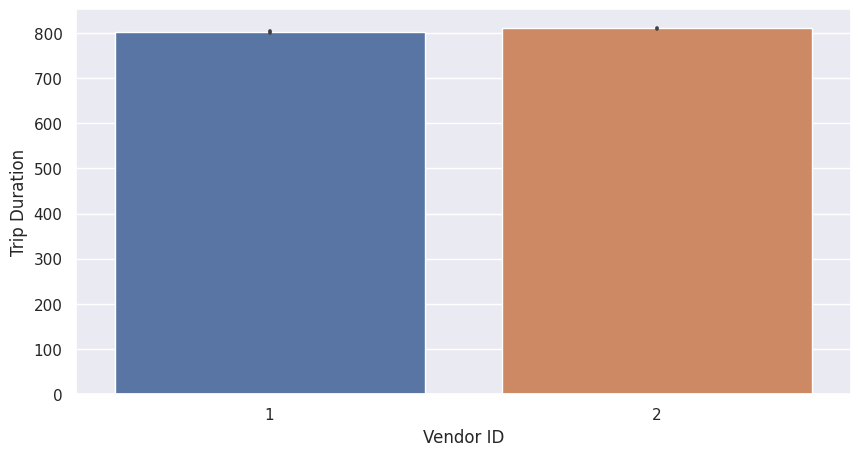

In [106]:
# Chart - 13 visualization code
# Visualization of store and fwd flag with distance
plt.figure(figsize = (10,5))
sns.barplot(y='trip_duration',x='vendor_id',data=df)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.show()


##### 1. Why did you pick the specific chart?

To compare the duration of trips for both vendors.

##### 2. What is/are the insight(s) found from the chart?

Vendore 2 has the more duration of trips.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Vendore 2 vehicles traveling more duration so the vehicles need to be in proper maintenance.

#### Chart - 14 - Correlation Heatmap

<Axes: >

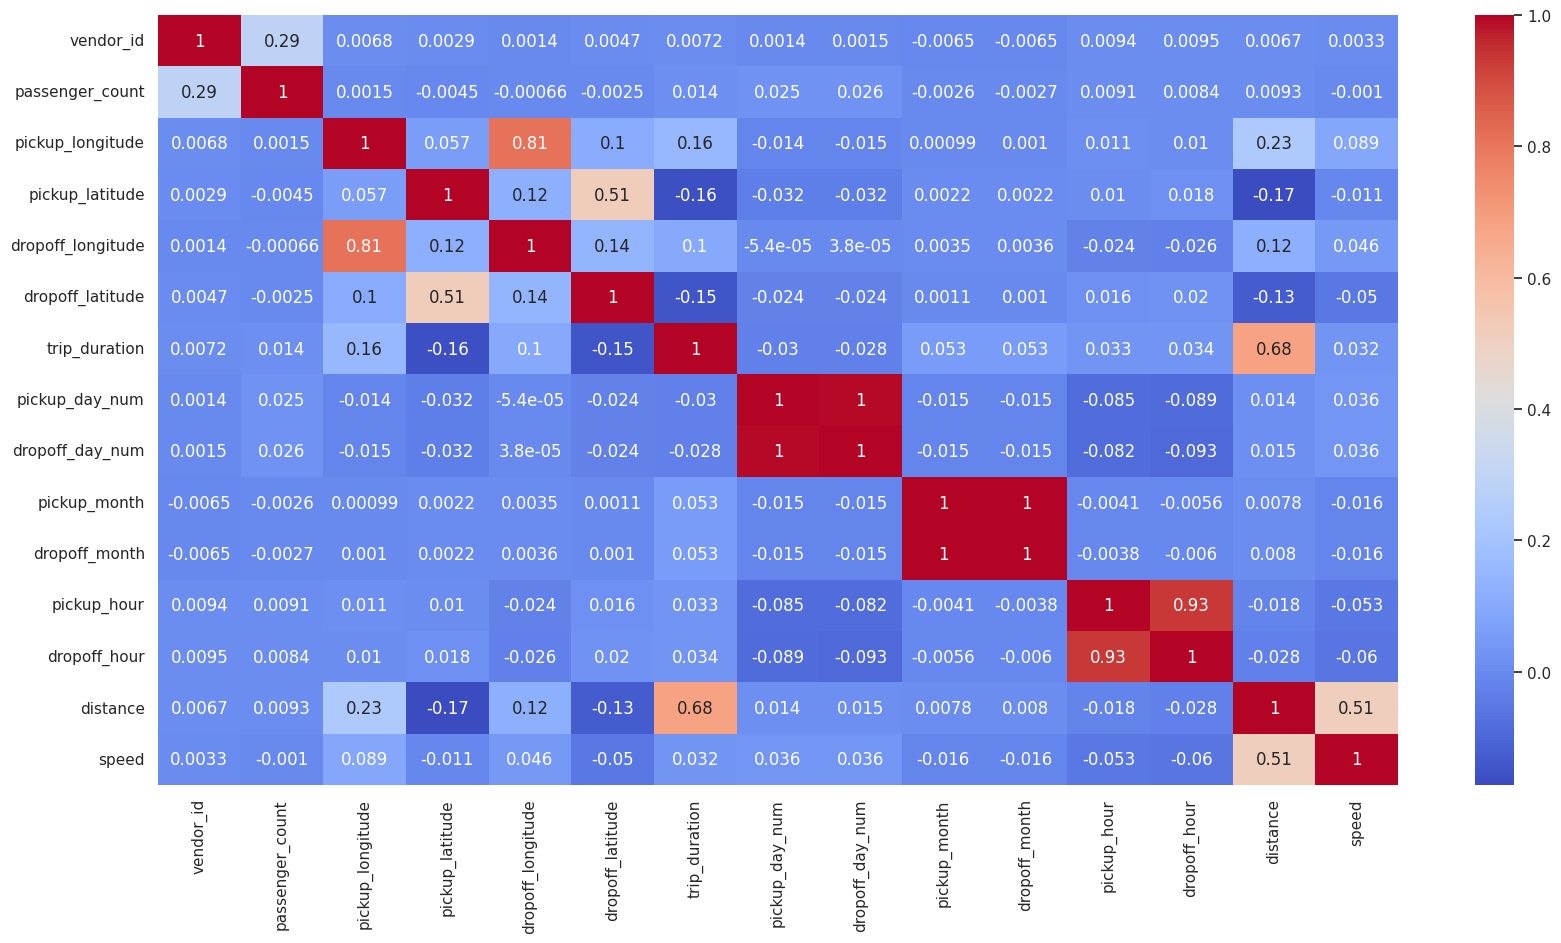

In [107]:
# Correlation Heatmap visualization code
# Visualization of correlation between all variables
plt.figure(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

To find the correlation between all the variables.

##### 2. What is/are the insight(s) found from the chart?

pickup hour and drop hour highly correlated.trip duration nd distance highly correlated.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The correlation values between the variables shows their relations.The company can identify how value changing based on the variables.

#### Chart - 15 - Pair Plot 

Text(0.5, 1.0, 'Trip Duration v/s Passanger count')

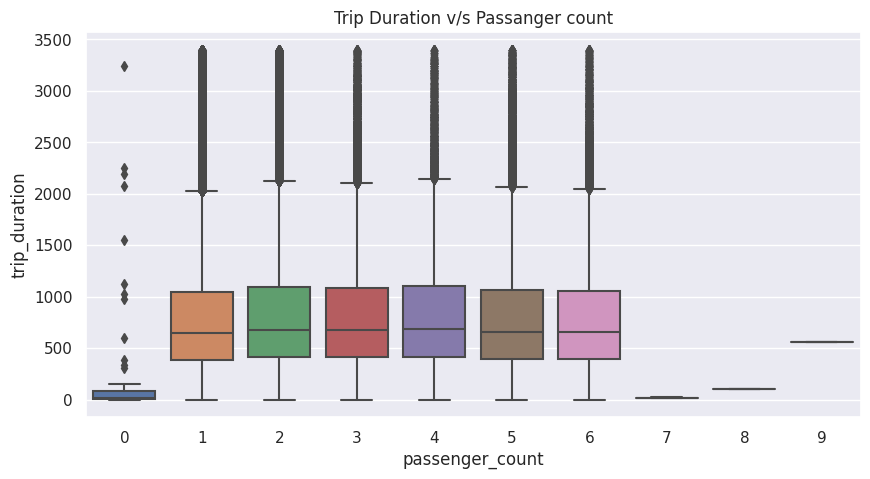

In [108]:
# Pair Plot visualization code
# Visualization of Trip Duration v/s Passanger count
sns.boxplot(x=df['passenger_count'],y=df['trip_duration'])
plt.title('Trip Duration v/s Passanger count')

##### 1. Why did you pick the specific chart?

To check the passanger count and trip duration relation.

##### 2. What is/are the insight(s) found from the chart?

During 4 passanger traveling the trip duration are more.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The trip duration is more during 4 passanger travel.The company can instruct the drivers while travel with 4 passanger keep excess fuel.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : 'passenger_count' and 'vendor_id' has no relationship.

H1 : 'passenger_count' and 'vendor_id' has relationship.

#### 2. Perform an appropriate statistical test.

In [110]:
# Perform Statistical Test to obtain P-Value
# Creating dataframe for passenger count and vendore id
ht_1 = pd.crosstab(df.passenger_count,df.vendor_id)
ht_1 = pd.DataFrame(ht_1)
ht_1.reset_index(inplace=True)
ht_1['Total'] = ht_1[1] + ht_1[2]
ht_1 = ht_1.iloc[1:7,:]
ht_1.set_index('passenger_count',inplace=True)
ht_1.loc['Total'] = ht_1.iloc[:, :].sum()

In [ ]:
ht_1.head(2)

In [113]:
# Calcualtion the Chisquare value
alpha = 0.05
chi_square = 0
rows = ht_1.index.unique()
columns = ht_1.columns.unique()
for i in columns:
    for j in rows:
        O = ht_1[i][j]
        E = ht_1[i]['Total'] * ht_1['Total'][j] / ht_1['Total']['Total']
        chi_square += (O-E)**2/E

In [111]:
# Approach 1: p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 128896.5533403387  and p value is: 0.0
Null Hypothesis is rejected.


In [ ]:
# Approach 2: Critical value approach
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

##### Which statistical test have you done to obtain P-Value?

Chisquare test has been done to obtain the P-value

##### Why did you choose the specific statistical test?

The chisquare test is selected because of sample size is more and it is used to calculate the p value.Based on the p value we can decide reject null hypothesis or fail to reject null hypothesis.

### Hypothetical Statement - 2 Traffic hours on weekdays are different than traffic hours on weekends.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : Traffic hours on weekdays are same as traffic hours on weekends.

H1 : Traffic hours on weekdays are different than traffic hours on weekends.

#### 2. Perform an appropriate statistical test.

In [116]:
# Perform Statistical Test to obtain P-Value
# Creating dataframe for week day and Week end
dfweekday = df[['pickup_weekday','pickup_hour']]
weekd = []
for i in dfweekday['pickup_weekday']:
  if i in ['Saturday','Sunday']:
    weekd.append('Weekend')
  else:
    weekd.append('Weekday')
dfweekday['weekd'] = weekd
dfweekday.head(2)

,pickup_weekday,pickup_hour,weekd
0,Monday,17,Weekday
1,Sunday,0,Weekend


In [118]:
# Counting weekday and weekend trips in each hour
new = pd.crosstab(dfweekday.pickup_hour,dfweekday.weekd)
new = pd.DataFrame(new)
new.reset_index(inplace=True)
new['Total'] = new['Weekday'] + new['Weekend']
new = new.iloc[0:24,:]
new.set_index('pickup_hour',inplace=True)
new.loc['Total'] = new.iloc[:, :].sum()
new

weekd,Weekday,Weekend,Total
pickup_hour,,,
0,29124,23947,53071
1,17675,20698,38373
2,11117,16767,27884
3,7962,12859,20821
4,7419,8316,15735
5,10999,3948,14947
6,28181,4672,32853
7,48213,6560,54773
8,56522,9794,66316


In [119]:
# Calcualtion of Chisquare
alpha = 0.05
chi_square = 0
rows = new.index.unique()
columns = new.columns.unique()
for i in columns:
    for j in rows:
        O = new[i][j]
        E = new[i]['Total'] * new['Total'][j] / new['Total']['Total']
        chi_square += (O-E)**2/E

In [120]:
# Approach 1 p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 70700.163321045  and p value is: 0.0
Null Hypothesis is rejected.


In [121]:
# Approach 2 The critical value approach
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 70700.163321045  and critical value is: 65.17076890356982
Null Hypothesis is rejected.


##### Which statistical test have you done to obtain P-Value?

The chi-square test was done to obtain the P-value

##### Why did you choose the specific statistical test?

The chi square test is used to find the significant association between two categorical variables due to that reason the particular test has been choosen.

### Hypothetical Statement - 3  Weekends has more traffic as compared to week days.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : mean of count of trips on weekday <= mean of count of trips on weekend day

H1 : mean of count of trips on weekday > mean of count of trips on weekend day

#### 2. Perform an appropriate statistical test.

In [122]:
# Perform Statistical Test to obtain P-Value
# Normalizing pickup datetime
df['pickup_date'] = pd.to_datetime(df["pickup_datetime"]).dt.normalize()

In [123]:
dfweekday = pd.DataFrame(df.pickup_date.value_counts())
dfweekday.reset_index(inplace=True)
dfweekday.rename(columns={'index':'date','pickup_date':'count'},inplace=True) 

dfweekday['pickup_weekday'] = dfweekday.apply(lambda row: row['date'].strftime("%A"),axis=1) #Monday=1
dfweekday.head(4)

cnt = list(dfweekday['count'])
weekday = list(dfweekday['pickup_weekday'])

In [125]:

weekd = []
weekn = []
for i in range(len(cnt)):
  if weekday[i] in ['Saturday','Sunday']:
    weekn.append(cnt[i])
  else:
    weekd.append(cnt[i])

In [127]:

from scipy.stats import ttest_ind  
    
def t_test(x,y,alternative='both-sided'):
        _, double_p = ttest_ind(x,y,equal_var = False)
        if alternative == 'both-sided':
            pval = double_p
        elif alternative == 'greater':
            if np.mean(x) > np.mean(y):
                 pval = double_p/2.
            else:
                 pval = 1.0 - double_p/2.
        elif alternative == 'less':
            if np.mean(x) < np.mean(y):
                 pval = double_p/2.
            else:
              pval = 1.0 - double_p/2.

        op = 'Hence we are failed to reject null hypothesis (H0) for significane level 0.05'
        if pval < 0.05:
          op = 'Hence we are rejecting null hypothesis (H0) for significane level 0.05 '
        return (f'P-Value: {pval}, {op}')

In [128]:

t_test(x=weekn,y=weekd,alternative='greater')

'P-Value: 0.43573390493606323, Hence we are failed to reject null hypothesis (H0) for significane level 0.05'

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***